In [27]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

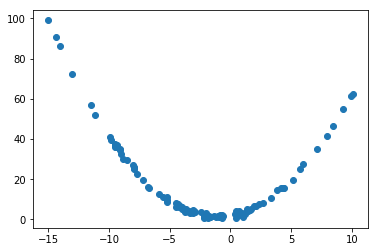

In [29]:
X_data = 6 * np.random.randn(100,1) -3
y_data = 0.5*X_data**2 + X_data + 2 + np.random.randn(100,1)
plt.scatter(X_data, y_data)
plt.show()

In [30]:
data = np.c_[X_data, y_data]
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
X_train, y_train = np.hsplit(train_set, 2)
X_test, y_test = np.hsplit(test_set, 2)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_train[0], X_poly[0]

(array([ 3.31698779]), array([  3.31698779,  11.00240803]))

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.93702341]), array([[ 1.04915178,  0.49966823]]))

**Note**: 1.93 ~2, 1.049 ~ 1 and 0.49 ~ 0.5 as taken before

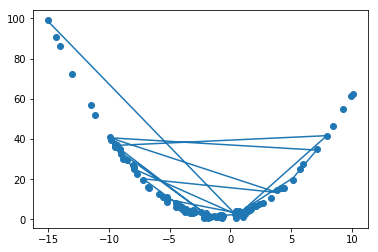

In [63]:
X_test_poly = poly_features.fit_transform(X_test)
y_pred = lin_reg.predict(X_test_poly)

plt.scatter(X_data, y_data)
plt.plot(X_test, y_pred, label='quadratic')
plt.show()

In [23]:
from sklearn.pipeline import Pipeline

lin_reg = 0
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
))

polynomial_regression.fit(X_train, y_train)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))))